In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialisation
def initialisation(X, num_classes):
    W = np.random.randn(X.shape[1], num_classes)
    b = np.random.randn(num_classes)
    return W, b

# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

# Fonction Coût pour la classification binaire
def log_loss_binary(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

# Gradients pour la classification binaire
def gradients_binary(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return dW, db

# Optimisation pour la classification binaire
def optimisation_binary(X, W, b, A, y, learning_rate):
    dW, db = gradients_binary(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def train_multiclass_model(X, y, num_classes, learning_rate=0.1, n_iter=10000):
    # Initialisation des poids W et du biais b
    W, b = initialisation(X, num_classes)
    
    # Initialisation d'un dictionnaire pour stocker l'historique des erreurs pour chaque classe
    loss_history = {c: [] for c in range(num_classes)}

    # Boucle sur le nombre d'itérations
    for i in range(n_iter):
        # Boucle sur chaque classe
        for c in range(num_classes):
            # Conversion des étiquettes en binaire (classe vs. non-classe)
            y_binary = (y == c).astype(int)
            
            # Calcul de la prédiction (probabilité) pour la classe c
            A = modele(X, W[:, c], b[c])
            
            # Calcul de la perte (log loss) pour la classe c
            loss = log_loss_binary(y_binary, A)
            
            # Calcul des gradients pour la classe c
            dW, db = gradients_binary(X, A, y_binary)
            
            # Mise à jour des poids W et du biais b pour la classe c
            W[:, c] = W[:, c] - learning_rate * dW
            b[c] = b[c] - learning_rate * db
            
            # Enregistrement de l'erreur dans l'historique
            loss_history[c].append(loss)

    # Tracé de l'évolution de l'erreur pour chaque classe
    for c in range(num_classes):
        plt.plot(loss_history[c], label=f'Model for Class {c}')

    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    plt.legend()
    plt.show()

    return W, b


# Prédiction des probabilités
def predict(X, W, b):
    Z = X.dot(W) + b # o(1)
    A = sigmoid(Z)
    return A

In [3]:
# Chargement des données
dataset = pd.read_csv("iris.csv")


In [4]:
# Séparation des caractéristiques (X) et des étiquettes (y)
X = dataset[['sepal_length', 'sepal_width', 'petal_length']].values
y = dataset['class'].values
print(X.shape)
print(y.shape)


(150, 3)
(150,)


In [5]:
# Conversion des étiquettes en valeurs numériques
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([class_mapping[label] for label in y])


In [6]:
# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(120, 3)
(30, 3)


In [7]:
xtrain_mean = np.mean(X_train,axis=0)
xtrain_std = np.std(X_train,axis=0)

X_train = (X_train - xtrain_mean)/xtrain_std
X_test = (X_test - xtrain_mean)/xtrain_std

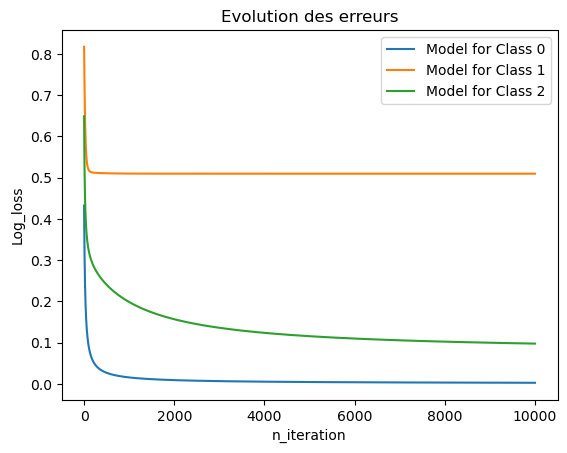

In [8]:
# Entraînement du modèle pour toutes les classes
num_classes = 3
W, b = train_multiclass_model(X_train, y_train, num_classes)

In [9]:
# Extraction des poids pour chaque classe
W_setosa, W_versicolor, W_virginica = W.T
b_setosa, b_versicolor, b_virginica = b

In [10]:
probs_setosa = predict(X_test, W_setosa, b_setosa)
probs_versicolor = predict(X_test, W_versicolor, b_versicolor)
probs_virginica = predict(X_test, W_virginica, b_virginica)
probs_setosa

array([1.47128448e-04, 9.99373632e-01, 5.74635665e-10, 6.67105966e-04,
       1.33096961e-05, 9.98220571e-01, 2.92142962e-02, 2.75642886e-05,
       4.36495586e-06, 1.94832352e-03, 1.73584773e-04, 9.97272078e-01,
       9.99281655e-01, 9.97382280e-01, 9.99942567e-01, 1.89501713e-03,
       6.48632268e-06, 1.00736946e-03, 8.76956068e-04, 4.41497981e-06,
       9.98983305e-01, 2.92322207e-04, 9.99289442e-01, 4.41497981e-06,
       2.62830938e-06, 2.00716284e-05, 1.50208654e-07, 6.95405689e-06,
       9.97272078e-01, 9.97416166e-01])

In [11]:
# Prédiction des classes
y_pred_setosa = (probs_setosa >= 0.5).astype(int)
y_pred_versicolor = (probs_versicolor >= 0.5).astype(int)
y_pred_virginica = (probs_virginica >= 0.5).astype(int)

print(y_pred_setosa)

[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [12]:
ProbaFinal = [probs_setosa,probs_versicolor,probs_virginica]
ProbaFinal

[array([1.47128448e-04, 9.99373632e-01, 5.74635665e-10, 6.67105966e-04,
        1.33096961e-05, 9.98220571e-01, 2.92142962e-02, 2.75642886e-05,
        4.36495586e-06, 1.94832352e-03, 1.73584773e-04, 9.97272078e-01,
        9.99281655e-01, 9.97382280e-01, 9.99942567e-01, 1.89501713e-03,
        6.48632268e-06, 1.00736946e-03, 8.76956068e-04, 4.41497981e-06,
        9.98983305e-01, 2.92322207e-04, 9.99289442e-01, 4.41497981e-06,
        2.62830938e-06, 2.00716284e-05, 1.50208654e-07, 6.95405689e-06,
        9.97272078e-01, 9.97416166e-01]),
 array([0.47830906, 0.04400747, 0.74204998, 0.39176856, 0.57215846,
        0.13412785, 0.38030186, 0.32735956, 0.88346815, 0.55915079,
        0.21700491, 0.30119074, 0.10866156, 0.24218615, 0.03295001,
        0.16065926, 0.32078795, 0.68916258, 0.43188551, 0.47621868,
        0.16657282, 0.31033876, 0.10795108, 0.47621868, 0.0593759 ,
        0.37343238, 0.73950688, 0.21896061, 0.30119074, 0.22840409]),
 array([3.03742358e-01, 1.09094131e-09, 9.99

In [13]:
from tabulate import tabulate

In [14]:

# Transposer la liste pour mettre les éléments par colonne
transposed_data = list(map(list, zip(*ProbaFinal)))

# Spécifiez les en-têtes de lignes (noms des colonnes)
column_headers = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

# Utilisez la fonction tabulate pour afficher le tableau
table = tabulate(transposed_data, headers=column_headers, tablefmt="grid")

print(table)



+---------------+-------------------+------------------+
|   Iris-setosa |   Iris-versicolor |   Iris-virginica |
+===============+===================+==================+
|   0.000147128 |         0.478309  |      0.303742    |
+---------------+-------------------+------------------+
|   0.999374    |         0.0440075 |      1.09094e-09 |
+---------------+-------------------+------------------+
|   5.74636e-10 |         0.74205   |      0.999971    |
+---------------+-------------------+------------------+
|   0.000667106 |         0.391769  |      0.113645    |
+---------------+-------------------+------------------+
|   1.33097e-05 |         0.572158  |      0.176253    |
+---------------+-------------------+------------------+
|   0.998221    |         0.134128  |      9.37398e-10 |
+---------------+-------------------+------------------+
|   0.0292143   |         0.380302  |      0.00087258  |
+---------------+-------------------+------------------+
|   2.75643e-05 |         0.327

In [15]:
result=[]
#classe_mapping_final = {0: 'Iris-setosa',1: 'Iris-versicolor',2:'Iris-virginica'}
for i in range (len(ProbaFinal[0])):
  max=np.max([ProbaFinal[0][i],ProbaFinal[1][i],ProbaFinal[2][i]])
  for j in range (0,3):
    if max==ProbaFinal[j][i]:
      result.append(j)
result

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(y_test, result))
y_test

Accuracy= 1.0


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, result)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
